In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Data Collection and Summary

In [115]:
data = pd.read_excel('Mutual-Funds-India-Historical-NAV-Report.xlsx')

In [116]:
data = data.reindex(index=data.index[::-1]).reset_index()

In [117]:
data.drop('index',axis = 1,inplace = True)

In [118]:
data

,NAV Date,NAV (Rs)
0,14-09-2017,190.7901
1,15-09-2017,190.7968
2,18-09-2017,191.7740
3,19-09-2017,192.0015
4,20-09-2017,192.1447
...,...,...
1228,08-09-2022,354.3166
1229,09-09-2022,355.4350
1230,12-09-2022,356.4694
1231,13-09-2022,357.7128


([<matplotlib.axis.XTick at 0x187a5e2da30>,
 [Text(0, 0, '14-09-2017'),
  Text(30, 0, '31-10-2017'),
  Text(60, 0, '12-12-2017'),
  Text(90, 0, '24-01-2018'),
  Text(120, 0, '12-03-2018'),
  Text(150, 0, '25-04-2018'),
  Text(180, 0, '07-06-2018'),
  Text(210, 0, '19-07-2018'),
  Text(240, 0, '03-09-2018'),
  Text(270, 0, '19-10-2018'),
  Text(300, 0, '05-12-2018'),
  Text(330, 0, '17-01-2019'),
  Text(360, 0, '28-02-2019'),
  Text(390, 0, '15-04-2019'),
  Text(420, 0, '31-05-2019'),
  Text(450, 0, '15-07-2019'),
  Text(480, 0, '28-08-2019'),
  Text(510, 0, '15-10-2019'),
  Text(540, 0, '29-11-2019'),
  Text(570, 0, '13-01-2020'),
  Text(600, 0, '25-02-2020'),
  Text(630, 0, '13-04-2020'),
  Text(660, 0, '28-05-2020'),
  Text(690, 0, '09-07-2020'),
  Text(720, 0, '20-08-2020'),
  Text(750, 0, '01-10-2020'),
  Text(780, 0, '13-11-2020'),
  Text(810, 0, '30-12-2020'),
  Text(840, 0, '11-02-2021'),
  Text(870, 0, '26-03-2021'),
  Text(900, 0, '14-05-2021'),
  Text(930, 0, '25-06-2021'),
 

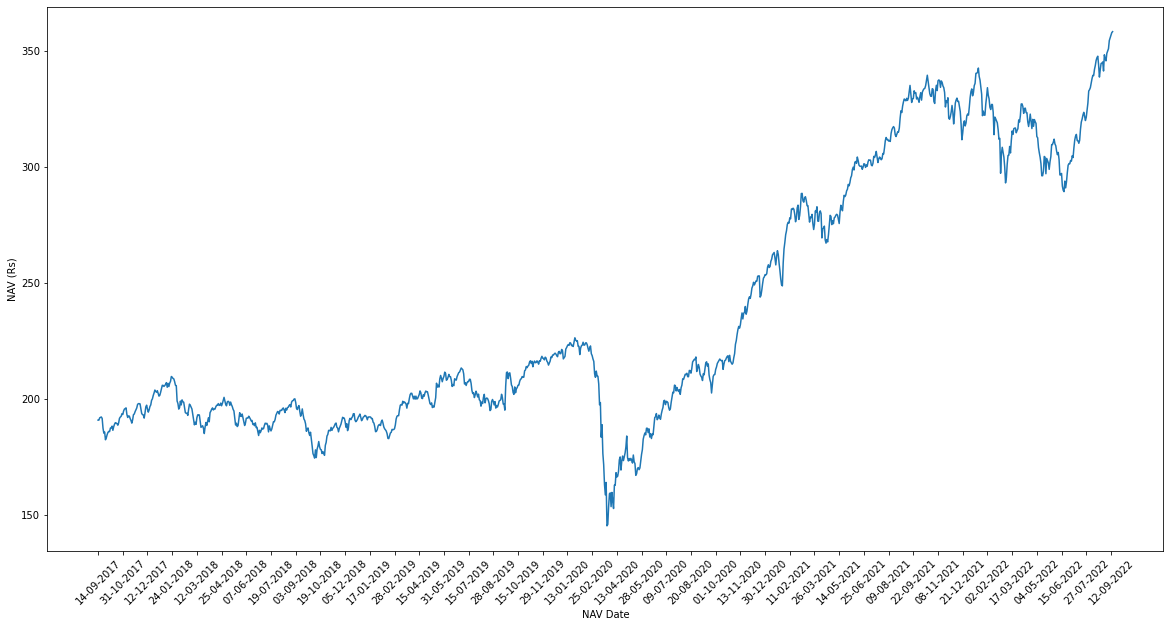

In [119]:
plt.figure(figsize=(20,10))
sns.lineplot( x=data['NAV Date'],y=data['NAV (Rs)'])
plt.xticks(range(0,data.shape[0],30),data['NAV Date'].loc[::30],rotation = 45)

In [120]:
data.shape

(1233, 2)

# 2. Splitting Data in train and test set

In [121]:
train_data,test_data =data[0:900],data[900:len(data)]

In [122]:
train_data

,NAV Date,NAV (Rs)
0,14-09-2017,190.7901
1,15-09-2017,190.7968
2,18-09-2017,191.7740
3,19-09-2017,192.0015
4,20-09-2017,192.1447
...,...,...
895,06-05-2021,278.2780
896,07-05-2021,279.0887
897,10-05-2021,279.4743
898,11-05-2021,279.0901


In [123]:
test_data

,NAV Date,NAV (Rs)
900,14-05-2021,275.4907
901,17-05-2021,280.3328
902,18-05-2021,283.3568
903,19-05-2021,281.8694
904,20-05-2021,280.9877
...,...,...
1228,08-09-2022,354.3166
1229,09-09-2022,355.4350
1230,12-09-2022,356.4694
1231,13-09-2022,357.7128


In [124]:
test_data = test_data['NAV (Rs)']

In [125]:
test_data

900     275.4907
901     280.3328
902     283.3568
903     281.8694
904     280.9877
          ...   
1228    354.3166
1229    355.4350
1230    356.4694
1231    357.7128
1232    358.1438
Name: NAV (Rs), Length: 333, dtype: float64

In [126]:
train_data = train_data['NAV (Rs)']
train_data 

0      190.7901
1      190.7968
2      191.7740
3      192.0015
4      192.1447
         ...   
895    278.2780
896    279.0887
897    279.4743
898    279.0901
899    277.3069
Name: NAV (Rs), Length: 900, dtype: float64

In [127]:
len(train_data), len(test_data)

(900, 333)

# 3. Data preprocessing

### Applying MinMaxScaler for scaling data, as LSTM is sentivie to scale of data.

In [128]:
scaler = MinMaxScaler(feature_range=(0,1))

In [130]:
scaled_train_data = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
scaled_test_data = scaler.transform(np.array(test_data).reshape(-1, 1))

In [131]:
scaled_test_data

array([[0.90934565],
       [0.9431566 ],
       [0.9642723 ],
       [0.95388622],
       [0.94772957],
       [0.97603117],
       [0.99425812],
       [0.99024307],
       [0.99521475],
       [1.00752735],
       [1.01237545],
       [1.02695463],
       [1.0228502 ],
       [1.03239556],
       [1.0468721 ],
       [1.0529275 ],
       [1.0713786 ],
       [1.07876839],
       [1.07039683],
       [1.09365342],
       [1.0960052 ],
       [1.09041275],
       [1.10931074],
       [1.09909574],
       [1.08521762],
       [1.08194692],
       [1.08117882],
       [1.08226393],
       [1.07235617],
       [1.079047  ],
       [1.08925152],
       [1.08802885],
       [1.07816439],
       [1.08557164],
       [1.08153284],
       [1.09450461],
       [1.10117449],
       [1.09947211],
       [1.10010684],
       [1.08524136],
       [1.08293357],
       [1.09052377],
       [1.11121213],
       [1.10809784],
       [1.11573203],
       [1.12628779],
       [1.10873606],
       [1.092

### Convert an array of values into a dataset matrix

In [132]:
def preprocess_data(df,time_step = 90):
  X_data = []
  y_data = []
  for i in range(len(df) - time_step-1):
    temp = df[i:(i + time_step),0]
    X_data.append(temp)
    y_data.append(df[i + time_step,0])
  return np.array(X_data), np.array(y_data)

In [133]:
X_train,y_train = preprocess_data(scaled_train_data)
X_test,y_test = preprocess_data(scaled_test_data)

In [134]:
X_train.shape

(809, 90)

### Reshape input to be [samples, time steps, features] which is required for LSTM

In [135]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 4. Model Building - Stacked LSTM

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [137]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(90,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [138]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 90, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 90, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [139]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size= 32,verbose=1)

Epoch 1/100
26/26 [==============================] - 10s 136ms/step - loss: 0.0397 - val_loss: 0.0494
Epoch 2/100
26/26 [==============================] - 2s 85ms/step - loss: 0.0071 - val_loss: 0.0064
Epoch 3/100
26/26 [==============================] - 2s 86ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 4/100
26/26 [==============================] - 2s 85ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 5/100
26/26 [==============================] - 2s 83ms/step - loss: 0.0062 - val_loss: 0.0044
Epoch 6/100
26/26 [==============================] - 2s 91ms/step - loss: 0.0046 - val_loss: 0.0072
Epoch 7/100
26/26 [==============================] - 2s 92ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 8/100
26/26 [==============================] - 2s 80ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 9/100
26/26 [==============================] - 2s 85ms/step - loss: 0.0045 - val_loss: 0.0164
Epoch 10/100
26/26 [==============================] - 2s 85ms/step - loss: 0.0047 - val_loss: 0.00

# 5. Predicting Test data

In [140]:
train_pred=model.predict(X_train)

In [141]:
test_pred = model.predict(X_test)
test_pred

array([[1.2764264],
       [1.2745138],
       [1.2816155],
       [1.2863714],
       [1.2891107],
       [1.2843953],
       [1.2809124],
       [1.2771095],
       [1.2724193],
       [1.2745327],
       [1.2808075],
       [1.2792432],
       [1.2831289],
       [1.2882711],
       [1.2928408],
       [1.2957487],
       [1.2994606],
       [1.3064799],
       [1.3159494],
       [1.3167325],
       [1.309229 ],
       [1.2982773],
       [1.2889917],
       [1.2841098],
       [1.2895182],
       [1.2950544],
       [1.2876526],
       [1.2778126],
       [1.2819862],
       [1.2927437],
       [1.2962494],
       [1.3047553],
       [1.311295 ],
       [1.3139741],
       [1.308705 ],
       [1.3093103],
       [1.3099968],
       [1.3078569],
       [1.3047037],
       [1.2984664],
       [1.2814642],
       [1.2740085],
       [1.2704619],
       [1.2738509],
       [1.259719 ],
       [1.2450218],
       [1.2375603],
       [1.2388041],
       [1.2476203],
       [1.2489733],


## Transforming to original form

In [142]:
y_test_transform = scaler.inverse_transform(y_test.reshape(-1, 1))


In [143]:
train_pred_transform = scaler.inverse_transform(train_pred)
test_pred_transform = scaler.inverse_transform(test_pred)
test_pred_transform

array([[328.0607 ],
       [327.7868 ],
       [328.80386],
       [329.48492],
       [329.87723],
       [329.20193],
       [328.70316],
       [328.15854],
       [327.48685],
       [327.7895 ],
       [328.68814],
       [328.4641 ],
       [329.02057],
       [329.757  ],
       [330.41144],
       [330.82788],
       [331.35947],
       [332.36472],
       [333.72086],
       [333.83298],
       [332.7584 ],
       [331.18997],
       [329.8602 ],
       [329.16107],
       [329.9356 ],
       [330.72845],
       [329.66843],
       [328.25922],
       [328.85693],
       [330.39752],
       [330.8996 ],
       [332.1177 ],
       [333.0543 ],
       [333.43796],
       [332.68335],
       [332.77005],
       [332.86838],
       [332.5619 ],
       [332.11035],
       [331.2171 ],
       [328.78217],
       [327.71445],
       [327.2065 ],
       [327.69186],
       [325.66803],
       [323.56323],
       [322.49466],
       [322.6728 ],
       [323.93536],
       [324.12912],


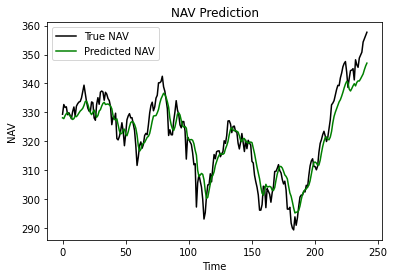

In [144]:
plt.plot(y_test_transform, color = 'black', label = 'True NAV')
plt.plot(test_pred_transform, color = 'green', label = 'Predicted NAV')
plt.title('NAV Prediction')
plt.xlabel('Time')
plt.ylabel('NAV')
plt.legend()
plt.show()

In [145]:
len(test_data)

333

# Calculate Performance Metrics

In [146]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## 1. RMSE

In [147]:
math.sqrt(mean_squared_error(y_test_transform,test_pred_transform))

4.920471714631539

## 2. Mean Absolute Error(MAE)

In [148]:
mean_absolute_error(y_test_transform,test_pred_transform)

3.9024248668323867

## 3. Mean Absolute Percentage Error

In [149]:
mean_absolute_percentage_error(y_test_transform,test_pred_transform)

0.012110720508086628

## 4. Coefficient of Determination-R2 score

In [150]:
from sklearn.metrics import r2_score

In [151]:
r2 = r2_score(y_test_transform,test_pred_transform)
print(r2)

0.8871855632762555


# Final Prediction

In [152]:
len(y_test_transform)

242

In [153]:
x_input=scaled_test_data[243:].reshape(1,-1)
x_input.shape

(1, 90)

In [154]:
x_input

array([[1.12194594, 1.10857825, 1.08955876, 1.05302526, 1.05301897,
        1.06647464, 1.11105222, 1.10880798, 1.05908136, 1.1052063 ,
        1.09869074, 1.09153696, 1.07224166, 1.09529296, 1.11036792,
        1.14661304, 1.14693843, 1.1542193 , 1.16312015, 1.14866246,
        1.14329905, 1.12710406, 1.1164708 , 1.12311764, 1.10188184,
        1.05557185, 1.05543499, 1.05997514, 1.02184888, 1.00962426,
        1.00521957, 1.03686309, 1.01652317, 1.03476828, 1.06218587,
        1.08464922, 1.08956016, 1.0891405 , 1.09904058, 1.09704073,
        1.11328459, 1.10782971, 1.13667805, 1.15989694, 1.17219138,
        1.17739838, 1.15897173, 1.15837052, 1.15068256, 1.15980616,
        1.1928958 , 1.21458128, 1.22363855, 1.23566975, 1.24381996,
        1.23246259, 1.21911445, 1.22891957, 1.24987466, 1.27160414,
        1.30778222, 1.3119921 , 1.31811523, 1.33153948, 1.3449749 ,
        1.35505303, 1.35426818, 1.37307679, 1.38466598, 1.39994693,
        1.40805455, 1.41259331, 1.38668887, 1.34

In [89]:
scaler.inverse_transform(model.predict(x_input))

array([[346.1353]], dtype=float32)

# The predicted NAV(net asset value) for Tata Large & Mid Cap Fund on 15 Sep 2022 is Rs.346.13